In [1]:
from utitlity_functions import *
import numpy as np
from confectionery import Confectionery
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from cluster_half_shelfs_alpha import Half_shelf_cluster
import scienceplots
import cv2 as cv
from matplotlib import cm
from scipy.stats import norm
from cluster_to_edge_pixel import contour_edge
np.random.seed(137)

In [2]:
object_trajectory=my_data = np.genfromtxt('/Users/Hoang_1/Desktop/Master_Arbeit/software/janus_particle_tracking/object_0_trajectory.csv', delimiter=',')
object_trajectory=object_trajectory[1:,:]
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
start_frame=round(object_trajectory[0,0])
end_frame=round(object_trajectory[-1,0])
stream_string=[]
for i in range(start_frame,end_frame+1):
    im_path="Image_Data/Aufnahmen_JPEG_06_07_take_2/Hoang_07_06_2023_Aufnahmen_Rollen_Partikel_Rollen_12_mu_200_002_t"+str(i).zfill(3)+".jpg"
    stream_string.append(im_path)
koppenrath=Confectionery()

In [3]:
# load normal trajectories
normal_vector_trajectory=np.load("/Users/Hoang_1/Desktop/Master_Arbeit/software/janus_particle_tracking/data/normal_vector_trajectory.npy")

# Calculate distance without interpolation or filtering from d=sqrt(dx^2+dy^2)

In [4]:
X=object_trajectory[:,1]
Y=object_trajectory[:,2]
dX=np.diff(X)
dY=np.diff(Y)

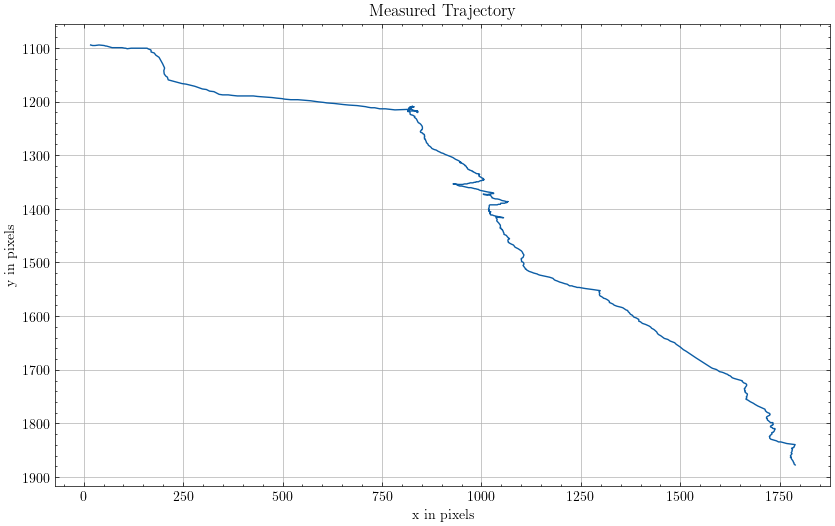

The travelled Distance (in Pixels) from the position trajectory is:3031.566138420955


In [5]:
L=np.add.accumulate(np.sqrt(dX**2+dY**2))
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.xlabel("x in pixels")
    plt.ylabel("y in pixels")
    plt.plot(X,Y)
    plt.grid()
    plt.gca().invert_yaxis()
    plt.title("Measured Trajectory")
    plt.show()
print("The travelled Distance (in Pixels) from the position trajectory is:" + str(L[-1]))

In [10]:
rot_traj=calculate_rotations_from_normal_vector_trajectory(normal_vector_trajectory)
angles=np.array([np.linalg.norm(x.as_rotvec()) for x in rot_traj.values()])
r=np.mean(object_trajectory[:,-1])
L_rot=np.add.accumulate(angles*r)

print("The travelled Distance (in Pixels) from the normal vector rot trajectory is:" + str(L_rot[-1]))


The travelled Distance (in Pixels) from the rot trajectory is:5802.109777357071


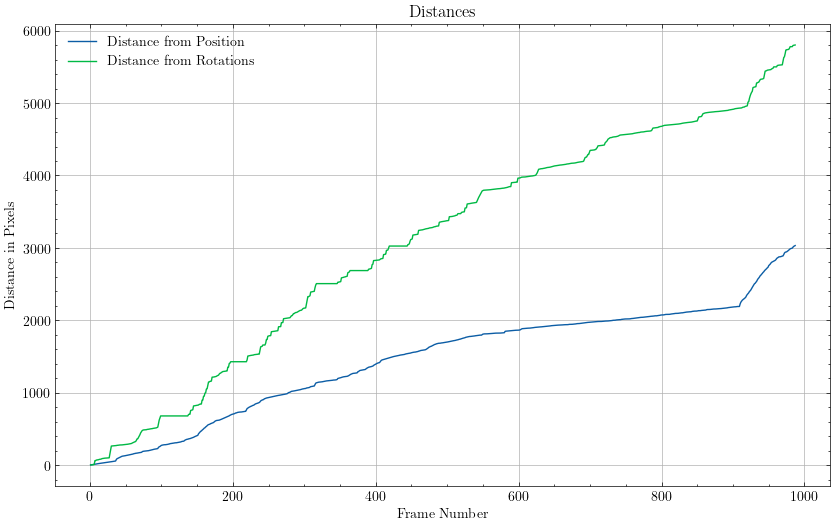

In [12]:
t=np.arange(L.size)+1
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.title("Distances")
    plt.xlabel("Frame Number")
    plt.ylabel("Distance in Pixels")
    plt.plot(t,L, label="Distance from Position")
    plt.plot(t,L_rot, label="Distance from Normal Rotations")
    plt.grid()
    plt.legend()
    plt.show()